In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Churn Dataset.csv",usecols=['customerID','TotalCharges','tenure','Churn'])
df.head()

,customerID,tenure,TotalCharges,Churn
0,7590-VHVEG,1,29.85,No
1,5575-GNVDE,34,1889.5,No
2,3668-QPYBK,2,108.15,Yes
3,7795-CFOCW,45,1840.75,No
4,9237-HQITU,2,151.65,Yes


In [3]:
df.shape

(7043, 4)

In [4]:
df.isna().sum()

customerID      0
tenure          0
TotalCharges    0
Churn           0
dtype: int64

In [5]:
df['customerID'].unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

Text(0.5, 1.0, 'tenure')

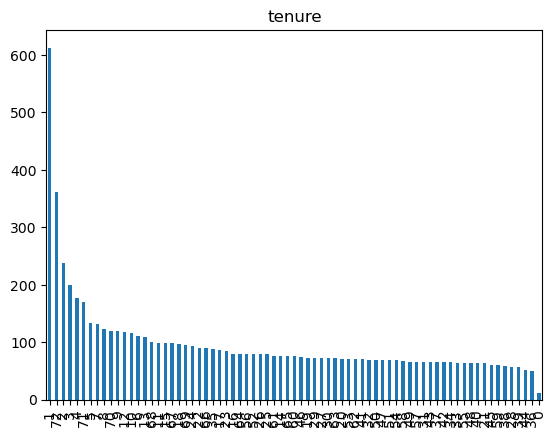

In [6]:
fig=df['tenure'].value_counts().plot.bar()
fig.set_title('tenure')

In [7]:
# extracting numerical part
df['customerID_numerical']=pd.to_numeric(df['customerID'],errors='coerce',downcast='integer')
df.head()

,customerID,tenure,TotalCharges,Churn,customerID_numerical
0,7590-VHVEG,1,29.85,No,NaN
1,5575-GNVDE,34,1889.5,No,NaN
2,3668-QPYBK,2,108.15,Yes,NaN
3,7795-CFOCW,45,1840.75,No,NaN
4,9237-HQITU,2,151.65,Yes,NaN


In [8]:
# extracting categorical part
df['customerID_catgorical']=np.where(df['customerID_numerical'].isnull(),df['customerID'],np.nan)
df.head()

,customerID,tenure,TotalCharges,Churn,customerID_numerical,customerID_catgorical
0,7590-VHVEG,1,29.85,No,NaN,7590-VHVEG
1,5575-GNVDE,34,1889.5,No,NaN,5575-GNVDE
2,3668-QPYBK,2,108.15,Yes,NaN,3668-QPYBK
3,7795-CFOCW,45,1840.75,No,NaN,7795-CFOCW
4,9237-HQITU,2,151.65,Yes,NaN,9237-HQITU


In [9]:
df['customerID_numerical']=df['customerID'].str.extract('(\d+)')
df['customerID_categorical']=df['customerID'].str[4:]
df.head()

,customerID,tenure,TotalCharges,Churn,customerID_numerical,customerID_catgorical,customerID_categorical
0,7590-VHVEG,1,29.85,No,7590,7590-VHVEG,-VHVEG
1,5575-GNVDE,34,1889.5,No,5575,5575-GNVDE,-GNVDE
2,3668-QPYBK,2,108.15,Yes,3668,3668-QPYBK,-QPYBK
3,7795-CFOCW,45,1840.75,No,7795,7795-CFOCW,-CFOCW
4,9237-HQITU,2,151.65,Yes,9237,9237-HQITU,-HQITU


In [10]:
df.drop(columns=['customerID_catgorical'],inplace=True)

In [11]:
df.head(3)

,customerID,tenure,TotalCharges,Churn,customerID_numerical,customerID_categorical
0,7590-VHVEG,1,29.85,No,7590,-VHVEG
1,5575-GNVDE,34,1889.5,No,5575,-GNVDE
2,3668-QPYBK,2,108.15,Yes,3668,-QPYBK


In [19]:
churn_counts = df['Churn'].value_counts()
churn_counts

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

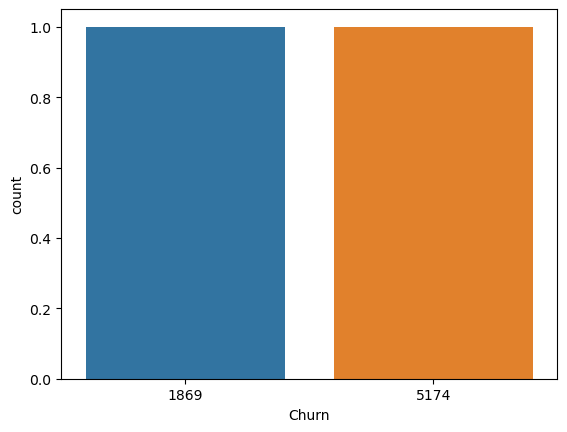

In [20]:
sns.countplot(churn_counts)

In [22]:
df['customerID_numerical'] = df['customerID'].apply(lambda s: s.split()[0:4])
df['customerID_numerical'] = pd.to_numeric(df['customerID_numerical'],
                                   errors='coerce',
                                   downcast='integer')

# extract the first part of ticket as category
df['customerID_categorical'] = df['customerID'].apply(lambda s: s.split()[4:])
df['customerID_categorical'] = np.where(df['customerID_categorical'].str.isdigit(), np.nan,
                              df['customerID_categorical'])
df.head()

,customerID,tenure,TotalCharges,Churn,customerID_numerical,customerID_categorical
0,7590-VHVEG,1,29.85,No,NaN,NaN
1,5575-GNVDE,34,1889.5,No,NaN,NaN
2,3668-QPYBK,2,108.15,Yes,NaN,NaN
3,7795-CFOCW,45,1840.75,No,NaN,NaN
4,9237-HQITU,2,151.65,Yes,NaN,NaN
